Atividade Individual 1 - *Thyroid Disease Data Set* 
======

> **Disciplina**: IN1166 - Soluções de Minerações de Dados <br>
> **Desenvolvedor**: Karl Vandesman de Matos Sousa <br>
> http://github.com/karlvandesman/

A atividade compreende a execução das tarefas a seguir para o problema de Tireóide (hiper e hipo) do UCI: https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease.

a) Realizar estudos para compreender melhor o domínio do problema e entender qual é a tarefa de mineração e condição de seus dados <br>
b) Realizar as tarefas de Análise Exploratória dos Dados, apresentando todos os gráficos vistos em sala de aula e demais informações para as bases de hipotireoidismo e hipertiroidismo. Fazendo análises e apontamentos com base nas informações extraídas dos dados. <br>
c) Realizar as tarefas de pré-processamento vistas em sala de aula nas bases com a devida justificativa

As bases utilizadas são as **allhyper.data** e **allhypo.data**. Logo, serão feitas análises semelhante para as bases de dados de Hipertireoidismo e Hipotireoidismo.

## Descrição do *Data Set*

Temos uma descrição dos atributos por meio do arquivo **allhypo.names** e **allhyper.names**. Vemos que os atributos são tanto categóricos como numéricos, sendo estes últimos a idade e alguns testes hormonais. As duas bases de dados possuem os mesmos atributos e mesmos valores para todos as observações. O que as diferencia, é o resultado, ou seja, a classe a que determinada observação está classificada.

| Atributo | Valores |
| :-------- | :------------ |
| age |			continuous |
| sex |				M, F |
| on thyroxine |	f, t |
| query on thyroxine |		f, t |
| on antithyroid medication |	f, t |
| sick |				f, t |
| pregnant |			f, t |
| thyroid surgery |		f, t |
| I131 treatment |			f, t |
| query hypothyroid |		f, t |
| query hyperthyroid |		f, t |
| lithium |			f, t |
| goitre |				f, t |
| tumor |				f, t |
| hypopituitary |			f, t| 
| psych |				f, t |
| TSH measured |			f, t |
| TSH |			continuous |
| T3 measured |			f, t |
| T3 |				continuous |
| TT4 measured |			f, t |
| TT4 |				continuous |
| T4U measured |			f, t |
| T4U |				continuous |
| FTI measured |			f, t |
| FTI |				continuous |
| TBG measured |			f, t |
| TBG |				continuous |
| referral source |		WEST, STMW, SVHC, SVI, SVHD, other |

E por fim, temos também a classes de cada caso (Hiper e hipo):

| Caso | Classes |
| ------| -------|
| Hypo | hypothyroid, primary hypothyroid, compensated hypothyroid, secondary hypothyroid, negative |
| Hyper | hyperthyroid, T3 toxic, goitre, secondary toxic, negative |

### Importando bibliotecas

In [104]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### Carregando o Data Set

In [105]:
# As urls obtidas no site UCI
urlHyper = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhyper.data"
urlHypo = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhypo.data"

# Passando o nome dos atributos
names = ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 
         'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 
         'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 
         'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 
         'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', "result"]

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataHyper = pd.read_csv(urlHyper, names=names)
dataHypo = pd.read_csv(urlHypo, names=names)

# Separando o último atributo do valor categórico e numérico
classSeriesHyper = pd.Series(dataHyper['result']) 
classSeriesHypo = pd.Series(dataHypo['result']) 

resultClassHyper = []
resultClassHypo = []

for i in classSeriesHyper:
    a, b = i.split(".|")
    resultClassHyper.append(a)

for i in classSeriesHypo:
    a, b = i.split(".|")
    resultClassHypo.append(a)

dataset = dataHyper.drop(columns=['result'])

dataset['class Hyper'] = resultClassHyper
dataset['class Hypo'] = resultClassHypo

### Apresentando os dados

In [106]:
print("Dimensões da base de dados (shape): ", dataset.shape)

Dimensões da base de dados (shape):  (2800, 31)


In [107]:
print("Primeiros dados")
dataset.head(5)

Primeiros dados


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class Hyper,class Hypo
0,41,F,f,f,f,f,f,f,f,f,...,125,t,1.14,t,109,f,?,SVHC,negative,negative
1,23,F,f,f,f,f,f,f,f,f,...,102,f,?,f,?,f,?,other,negative,negative
2,46,M,f,f,f,f,f,f,f,f,...,109,t,0.91,t,120,f,?,other,negative,negative
3,70,F,t,f,f,f,f,f,f,f,...,175,f,?,f,?,f,?,other,negative,negative
4,70,F,f,f,f,f,f,f,f,f,...,61,t,0.87,t,70,f,?,SVI,negative,negative


Os tipos de dados são apresentados abaixo. No entando, eles não estão corretamente listados pois em atributos numéricos, há valores ausentes representados por '?', e dessa forma a leitura csv intepreta erroneamente como *object*.

In [108]:
print("Tipos de dado de cada atributo")
dataset.dtypes

Tipos de dado de cada atributo


age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

Quanto à quantidade de dados ausentes, podemos ver no código abaixo que alguns atributos possuem uma quantidade expressiva, tais como TBG: 100%, T3: 21% e T4U: 11%. No entanto, observando os outros atributos, vemos que:
* TSH measured 
* TT4 measured
* T4U measured
* FTI measured
* TBG measured

Indicam a realização ou não de uma medição, com valores sendo f (para *false*) ou t (para *true*). Assim, quando a medição não está presente (ou seja, possui valor *f*, o atributo referente ao valor dessa medição não estará presente. No código abaixo veremos que coincide com os valores de caracteres '?'. 

Somente os atributos *age* e *sex* realmente possuem valores ausentes (no sentido de algum problema na obtenção dos dados). No entanto, esses são poquíssimos casos, ~4% e 0,36% do total de observações.

In [109]:
print("Quantidade de dados ausentes (caractere '?') por atributo")
print((dataset=='?').sum())

Quantidade de dados ausentes (caractere '?') por atributo
age                             1
sex                           110
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           284
T3 measured                     0
T3                            585
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           297
FTI measured                    0
FTI                           295
TBG measured                    0
TBG                     

In [110]:
print("Quantidade de observações onde não foram feitas medidas")
print((dataset[['TSH measured', 'T3 measured', 'TT4 measured', 'FTI measured', 'TBG measured']] == 'f').sum())

Quantidade de observações onde não foram feitas medidas
TSH measured     284
T3 measured      585
TT4 measured     184
FTI measured     295
TBG measured    2800
dtype: int64


Os valores únicos de cada atributo são listados abaixo. Os atributos que só possuem um valor único (*TBG* e *TBG Measured*) podem ser descartados pois não trazem informação.

In [111]:
print("Valores únicos de cada atributo")
print(dataset.nunique())

# Como a coluna TBG só possui valores '?', então pode ser descartada
# A coluna TBG measured também, já que só possui valores 'f', então não mais interessa
dataset = dataset.drop(columns=['TBG', 'TBG measured'])

Valores únicos de cada atributo
age                           94
sex                            3
on thyroxine                   2
query on thyroxine             2
on antithyroid medication      2
sick                           2
pregnant                       2
thyroid surgery                2
I131 treatment                 2
query hypothyroid              2
query hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH measured                   2
TSH                          264
T3 measured                    2
T3                            65
TT4 measured                   2
TT4                          218
T4U measured                   2
T4U                          139
FTI measured                   2
FTI                          210
TBG measured                   1
TBG                            1
referral source                5
class Hyper

### Conversão dos dados

Os valores nos atributos contínuos *TSH*, *T3*, *TT4*, *T4U* e *FTI* que possuem o caractere '?' são designados dessa forma pois sua medição não foi realizada, como vimos anteriormente por meio dos atributos correspondentes *T3 measured*, *TT4 measured*, *T4U measured* e *FTI measured*. Assim, basta substituirmos esses valores por NaN para que as funções estatísticas de Python possam trabalhar adequadamente. Lembrando que esses valores não foram "perdidos", por algum erro.

Outra abordagem deve ser realizada para os atributos em que realmente houve algum erro/perda nos dados, como *age* e *sex*, com 0,036% e 3,93% de valores ausentes, respectivamente.

In [112]:
# Substituindo os caracteres ? por NaN
dataset = dataset.replace('?', np.NaN)

# convertendo os dados com NaN para float
dados_continuos = {'age':float, 'TSH':float, 'T3':float, 'TT4':float, 'T4U':float, 'FTI':float}
dataset = dataset.astype(dados_continuos)

In [113]:
# Tipos de dado depois da conversão

dataset.dtypes

age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
referral source               object
c

### Estatística descritiva

Abaixo obtemos o agrupamento dos dados pela classe, mostrando a quantidade de cada. Vemos que os dados são desbalanceados, ou seja, a classe *negative* possui bem mais valores que os outros, representando 97,25% do total de casos.

In [114]:
print("Conhecendo a distribuicao dos dados por classes")
print(dataset.groupby('class Hyper').size())
print()

print(dataset.groupby('class Hypo').size())

Conhecendo a distribuicao dos dados por classes
class Hyper
T3 toxic           8
goitre             7
hyperthyroid      62
negative        2723
dtype: int64

class Hypo
compensated hypothyroid     154
negative                   2580
primary hypothyroid          64
secondary hypothyroid         2
dtype: int64


In [115]:
dataset.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000


Abaixo vemos que não há diferença significativa na idade dos pacientes agrupando-os pelo sexo. No entanto, a diferença é significativa observando a proporção de homens e mulheres. Vale ressaltar que a porcentagem não totaliza 100% porque há valores ausentes ('?').

In [116]:
print("Média de idade por sexo:")
print(dataset.groupby('sex', as_index=False).age.mean())
#print("Média geral de idade = %4.f" %(dataHyper['age'].mean()))
    
# Gênero
print("Porcentagem de Homens = %.2f" %(100*(dataset['sex']=='M').sum()/dataset.shape[0]))
print("Porcentagem de Mulheres = %.2f" %(100*(dataset['sex']=='F').sum()/dataset.shape[0]))

Média de idade por sexo:
  sex        age
0   F  52.020776
1   M  51.668605
Porcentagem de Homens = 30.71
Porcentagem de Mulheres = 65.36


Alguns casos de erros em valores são bastante simples de serem observados, pois a partir do significado dos atributos, podemos determinar faixa de valores permitidos. Como no caso da idade, temos que valores permitidos são maiores que zero, e o limite superior na faixa de 110~120 anos. A partir do código abaixo vemos que havia uma pessoa com 455 anos, o que obviamente indica um erro.

In [117]:
# Identificando erros na idade
idade_max = 110
print(dataset[dataset['age'] > 110])

indice_outliersIdade = dataset.index[dataset['age'] > idade_max]
indice_outliersTSH = dataset.index[dataset['TSH'] > 250]

# Precisamos obter a média de idades sem o outlier
mediaIdade = round((dataset[dataset['age'] < idade_max]).age.mean())
medianaTSH = (dataset[dataset['TSH'] < 250 ]).TSH.median()

print("Média de idade sem outlier", mediaIdade)
print("Mediana TSH", medianaTSH)

dataset.loc[indice_outliersIdade, 'age'] = mediaIdade
dataset.loc[indice_outliersTSH, 'TSH'] = medianaTSH

        age sex on thyroxine query on thyroxine on antithyroid medication  \
1364  455.0   F            f                  f                         f   

     sick pregnant thyroid surgery I131 treatment query hypothyroid  ...   T3  \
1364    f        f               f              f                 f  ...  2.0   

     TT4 measured    TT4 T4U measured   T4U FTI measured    FTI  \
1364            t  118.0            t  1.13            t  104.0   

      referral source class Hyper  class Hypo  
1364              SVI    negative    negative  

[1 rows x 29 columns]
Média de idade sem outlier 52
Mediana TSH 1.4


### Substituição dos valores ausentes

Dependendo dos dados de um atributo (e se ele é categórico ou numérico), pode haver um ou mais métodos apropriados para fazer a substituição dos valores ausentes.

A começar pelo atributo categórico *sex*, podemos substituir os valores ausentes p

In [118]:
# Abordagens para substituição do NaN
# Após as seguintes substituições, todos os atributos passarão a ter 2800 exemplos válidos (sem NaN)

print("Quantidade de dados 'válidos', sem considerar NaN")
print(dataset.count())

# Usando a média (mean) ou mediana (median) coluna por coluna
# Somente será substituído o valor para a idade (1 valor) como padrão, o que 
#  não trará relevância na mudança da técnica aplicada 

datasetFull = dataset

# Substituindo o valor de idade pela média (já que não possui muita variação)
datasetFull['age'].fillna((dataset['age']).mean(), inplace=True)
datasetFull['sex'].fillna(method='ffill', inplace=True) # substitui pelo próximo valor

# Substituindo o valor das taxas de hormônio pela mediana ("à prova de outlier")
datasetFull.fillna(dataset.median(), inplace=True)

# A seguir serão criados dataframes separados para cada método, de modo a avaliar suas performances
#datasetMean = dataset.fillna(dataset.mean())
#datasetMedian = dataset.fillna(dataset.median())

# Preenchendo com as ocorrencias mais próximas (forward-fill ou back-fill )
#datasetFfill = dataset.fillna(method='ffill') # substitui pelo próximo valor
#datasetBfill = dataset.fillna(method='bfill') # substitui pelo último valor

# Método da interpolação para encontrar os valores NaN
#datasetInterpolate = dataset.interpolate()

# Dataframe retirando todos os exemplos que contém pelo menos um dos atributos como NaN (69,57% do total)
#datasetReduced = dataset.dropna()

Quantidade de dados 'válidos', sem considerar NaN
age                          2799
sex                          2690
on thyroxine                 2800
query on thyroxine           2800
on antithyroid medication    2800
sick                         2800
pregnant                     2800
thyroid surgery              2800
I131 treatment               2800
query hypothyroid            2800
query hyperthyroid           2800
lithium                      2800
goitre                       2800
tumor                        2800
hypopituitary                2800
psych                        2800
TSH measured                 2800
TSH                          2516
T3 measured                  2800
T3                           2215
TT4 measured                 2800
TT4                          2616
T4U measured                 2800
T4U                          2503
FTI measured                 2800
FTI                          2505
referral source              2800
class Hyper                  280

## Visualização de gráficos

**Box plot** (diagrama de caixa): A partir dele podemos ver claramente a distribuição dos dados e sua dispersão, e também pode-se detectar facilmente os *outliers* de forma visual. Sem contar o os dados sobre a idade, onde se pode saber claramente se uma idade é falsa ou não (havia um *outlier* com idade maior que 400 anos), os dados de FTI, T3, T4U e TT4 possuem muitos pontos fora do mínimo ($Q_1 - 1,5IQR$) e do máximo ($Q_3 + 1,5IQR$).

**Histograma**: Gráfico clássico em que vemos se os dados se aproximam de uma distribuição normal (formato de sino).  Segundo o teorema central do limite, quando o tamanho da amostra tende a infinito, a distribuição amostral da sua média aproxima-se de uma distribuição normal.

**Gráficos de dispersão**: Analisa-se de dois em dois os atributos e observa-se a relação entre eles.

Criando gráficos de caixa da distribuição das classes


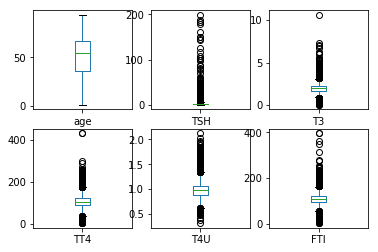

Criando histogramas dos dados por classes


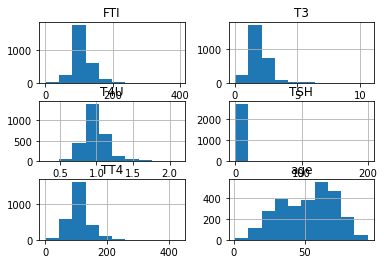

Criando gráficos de dispersão dos dados com paleta de cores
Classes do caso Hyper


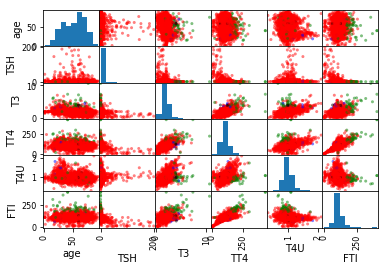

Classes do caso Hypo


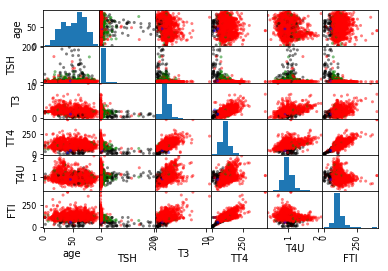

In [119]:
print("Criando gráficos de caixa da distribuição das classes")
datasetFull.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

print("Criando histogramas dos dados por classes")
datasetFull.hist()
plt.show()

print("Criando gráficos de dispersão dos dados com paleta de cores")

colorsHyper = {'negative': 'red', 'hyperthyroid': 'green', 'goitre': 'blue', 'T3 toxic': 'black'}
colorsHyper = [colorsHyper[c] for c in datasetFull['class Hyper']]

colorsHypo = {'compensated hypothyroid': 'green', 'negative': 'red', 'primary hypothyroid': 'black', 'secondary hypothyroid': 'blue'}
colorsHypo = [colorsHypo[c] for c in datasetFull['class Hypo']]

print("Classes do caso Hyper")
scatter_matrix(datasetFull, c=colorsHyper)
plt.show()

print("Classes do caso Hypo")
scatter_matrix(datasetFull, c=colorsHypo)
plt.show()

### Redução de dimensionalidade (PCA)

Abaixo vemos o procedimento do método de *Principal Component Analysis*, poderosa ferramenta de pré-processamento,  para se trabalhar com a redução de dimensionalidade, verificando a relação de atributos que não são importantes. A partir de todas as técnicas de substituição de valores ausentes consideradas, obtemos resultados semelhantes. Para todas as técnicas, considerando um número de componentes maior que 5 ($n_{componentes} \geq 5$), já obtém-se 100% da variância.

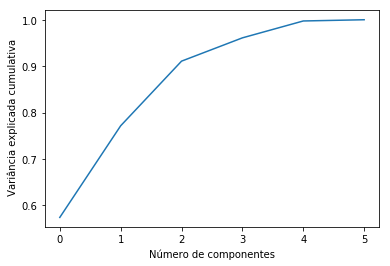

In [120]:
# Analisando com PCA a variância dos dados em relação aos atributos, apenas para valores numéricos
# Primeiramente, devemos normalizar os atributos numéricos que serão considerados
atributosNumericos = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
minMaxScaler = MinMaxScaler(feature_range=(0, 1))

X = datasetFull[atributosNumericos].values

XminMax = minMaxScaler.fit_transform(X)

pca = PCA().fit(XminMax)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Número de componentes');
plt.ylabel(' Variância explicada cumulativa');